In [1]:
## Import Libraries
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os
import xgboost as xgb 
from xgboost import XGBClassifier
from sklearn import preprocessing
#sns.set(style = "whitegrid", color_codes = True)
os.chdir('D:/Study/Python Programs/DDT Interview Practice/')

In [2]:
## Data Preprocessing
# read data
data = pd.read_csv('speeddating.csv')

# rename colunns
data = data.rename(columns={'ambition':'ambitious', "ambitous_o":"ambitious_o", 'sinsere_o':'sincere_o', 'intellicence_important':'intelligence_important', 'ambtition_important':'ambitious_important', 'ambition_partner':'ambitious_partner','d_sinsere_o':'d_sincere_o', 'd_ambitous_o':'d_ambitious_o', 'd_intellicence_important':'d_intelligence_important', 'd_ambtition_important':'d_ambitious_important', 'd_ambition':'d_ambitious', 'd_ambition_partner':'d_ambitious_partner'})

data = data.replace('?', 0)

In [3]:
## Extract Interest Data
interests = ['sports', 'tvsports', 'exercise', 'dining', 'museums', 'art', 'hiking', 'gaming', 'clubbing', 'reading', 'tv', 'theater', 'movies', 'concerts', 'music', 'shopping', 'yoga']
interest_data = data[interests]
# data = data.drop(interests, axis=1)

In [ ]:
# Plot Gender vs Age
x = data['age']
y = data['gender']

In [16]:
def SplitAgeRange(age_range):
    age1, age2 = age_range[1:-1].split('-')
    return int(age1), int(age2)

In [152]:
data['samerace'] = data['samerace'] == 0

In [4]:
# Split Data by Rating Targets
features = ['attractive','sincere','intelligence','funny','ambitious', 'shared_interests']
own_feature_data = data[features[:-1]] # rate themselves
partner_rating_data = data[[f'{f}_o' for f in features]] # rated by partner
feature_importance_data = data[[f'{f}_important' for f in features]] # ideal partner
partner_feature_data = data[[f'{f}_partner' for f in features]] # rate partner

In [5]:
# Split Data by Feature Types
#---attractive---
attractive_data = data[['attractive', 'attractive_o', 'attractive_partner']].astype(float)
attractive_data = attractive_data[(attractive_data != 0).all(1)]
#---sincere---
sincere_data = data[['sincere', 'sincere_o', 'sincere_partner']].astype(float)
sincere_data = sincere_data[(sincere_data != 0).all(1)]
#---intelligence---
intelligence_data = data[['intelligence', 'intelligence_o', 'intelligence_partner']].astype(float)
intelligence_data = intelligence_data[(intelligence_data != 0).all(1)]
#---funny---
funny_data = data[['funny', 'funny_o', 'funny_partner']].astype(float)
funny_data = funny_data[(funny_data != 0).all(1)]
#---ambitious---
ambitious_data = data[['ambitious', 'ambitious_o', 'ambitious_partner']].astype(float)
ambitious_data = ambitious_data[(ambitious_data != 0).all(1)]
#---shared_interests---
shared_interests_data = data[['shared_interests_o', 'shared_interests_partner']].astype(float)
shared_interests_data = shared_interests_data[(shared_interests_data != 0).all(1)]

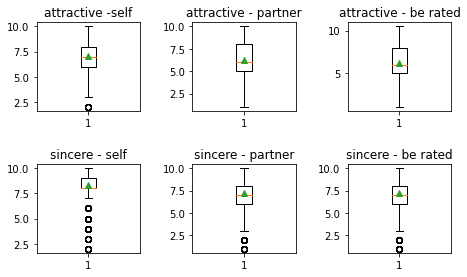

In [35]:
# Draw Attributes Boxplots - attractive & sincere

#print(attractive_data['attractive'].astype(float).mean())
#print(attractive_data['attractive_o'].astype(float).mean())
#print(attractive_data['attractive_partner'].astype(float).mean())

#attractive_data.astype(float).boxplot()
fig, axs = plt.subplots(2,3)
#---attractive---
axs[0,0].boxplot(attractive_data['attractive'], showmeans = True)
axs[0,0].set_title('attractive -self')

axs[0,1].boxplot(attractive_data['attractive_partner'], showmeans = True)
axs[0,1].set_title('attractive - partner')

axs[0,2].boxplot(attractive_data['attractive_o'], showmeans = True)
axs[0,2].set_title('attractive - be rated')

#---sincere----
axs[1,0].boxplot(sincere_data['sincere'], showmeans = True)
axs[1,0].set_title('sincere - self')

axs[1,1].boxplot(sincere_data['sincere_partner'], showmeans = True)
axs[1,1].set_title('sincere - partner')

axs[1,2].boxplot(sincere_data['sincere_o'], showmeans = True)
axs[1,2].set_title('sincere - be rated')

fig.subplots_adjust(left = 0.02, right = 0.98, bottom = 0.1, top = 0.9, hspace = 0.6, wspace = 0.5)

#Min_Max_Scaler = preprocessing.MinMaxScaler( feature_range=(0,1) ) # 設定縮放的區間上下限
#new_data = Min_Max_Scaler.fit_transform(attractive_data) # Data 為原始資料

#new_data = pd.DataFrame(data = new_data, columns = ['attractive', 'attractive_o', 'attractive_important', 'attractive_partner'])
#new_data.boxplot()

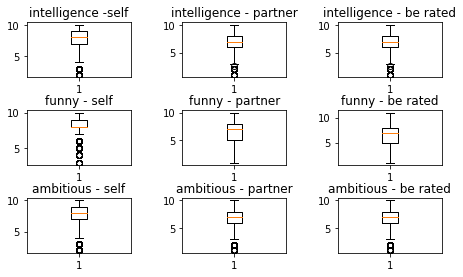

In [17]:
# Draw Attributes Boxplots - intelligence & funny & ambitious
fig, axs = plt.subplots(3,3)
#---intelligence---
axs[0,0].boxplot(intelligence_data['intelligence'], showmeans = True)
axs[0,0].set_title('intelligence -self')

axs[0,1].boxplot(intelligence_data['intelligence_partner'], showmeans = True)
axs[0,1].set_title('intelligence - partner')

axs[0,2].boxplot(intelligence_data['intelligence_o'], showmeans = True)
axs[0,2].set_title('intelligence - be rated')

#---funny----
axs[1,0].boxplot(funny_data['funny'], showmeans = True)
axs[1,0].set_title('funny - self')

axs[1,1].boxplot(funny_data['funny_partner'], showmeans = True)
axs[1,1].set_title('funny - partner')

axs[1,2].boxplot(funny_data['funny_o'], showmeans = True)
axs[1,2].set_title('funny - be rated')

#---ambitious---
axs[2,0].boxplot(ambitious_data['ambitious'])
axs[2,0].set_title('ambitious - self')

axs[2,1].boxplot(ambitious_data['ambitious_partner'])
axs[2,1].set_title('ambitious - partner')

axs[2,2].boxplot(ambitious_data['ambitious_o'])
axs[2,2].set_title('ambitious - be rated')

fig.subplots_adjust(left = 0.02, right = 0.98, bottom = 0.1, top = 0.9, hspace = 0.6, wspace = 0.5)

In [34]:
# Calculate Means of Each Ratings

#print(attractive_data['attractive'].mean())
#print(attractive_data['attractive_partner'].mean())
#print(attractive_data['attractive_o'].mean())

#print(sincere_data['sincere'].mean())
#print(sincere_data['sincere_partner'].mean())
#print(sincere_data['sincere_o'].mean())

#print(intelligence_data['intelligence'].mean()) #7.706845809341011
#print(intelligence_data['intelligence_partner'].mean()) #7.378438899552143
#print(intelligence_data['intelligence_o'].mean()) #7.380678182981446

print(funny_data['funny'].mean()) #8.409759271307742
print(funny_data['funny_partner'].mean()) #6.420364346128823
print(funny_data['funny_o'].mean()) #6.419648666232921




8.409759271307742
6.420364346128823
6.419648666232921


In [7]:
# Pearson Correlation Matrix (Ideal Partner)
corr_columns = ['importance_same_race', 'importance_same_religion', 'attractive_important', 'sincere_important', 'intelligence_important','funny_important', 'ambitious_important', 'shared_interests_important', 'interests_correlate', 'match']
corr_table = data[corr_columns[:-1]]
corr_table = corr_table.rename(columns={'importance_same_race':'same_race','importance_same_religion':'same_religion','attractive_important':'attractive', "sincere_important":"sincere", 'intelligence_important':'intelligence', 'funny_important':'funny', 'ambitious_important':'ambitious', 'shared_interests_important':'shared_interests'})
corr_table = corr_table[(corr_table != 0).all(1)] #delete rows with all rating zero
corr_table = corr_table.astype(float)
pearsoncorr = corr_table.corr(method = 'pearson')
pearsoncorr

,same_race,same_religion,attractive,sincere,intelligence,funny,ambitious,shared_interests,interests_correlate
same_race,1.000000,0.419332,-0.005382,-0.083358,0.006785,-0.007138,0.111109,-0.012030,-0.075893
same_religion,0.419332,1.000000,-0.140477,0.001063,0.091941,-0.059022,0.129633,0.097436,-0.041500
attractive,-0.005382,-0.140477,1.000000,-0.424393,-0.356064,-0.181271,-0.468604,-0.448971,-0.091295
sincere,-0.083358,0.001063,-0.424393,1.000000,-0.118743,-0.170646,-0.008511,0.027522,0.030494
intelligence,0.006785,0.091941,-0.356064,-0.118743,1.000000,-0.140213,-0.044960,-0.084061,0.089265
funny,-0.007138,-0.059022,-0.181271,-0.170646,-0.140213,1.000000,-0.073487,-0.196768,-0.017266
ambitious,0.111109,0.129633,-0.468604,-0.008511,-0.044960,-0.073487,1.000000,0.144762,0.026586
shared_interests,-0.012030,0.097436,-0.448971,0.027522,-0.084061,-0.196768,0.144762,1.000000,0.039259
interests_correlate,-0.075893,-0.041500,-0.091295,0.030494,0.089265,-0.017266,0.026586,0.039259,1.000000


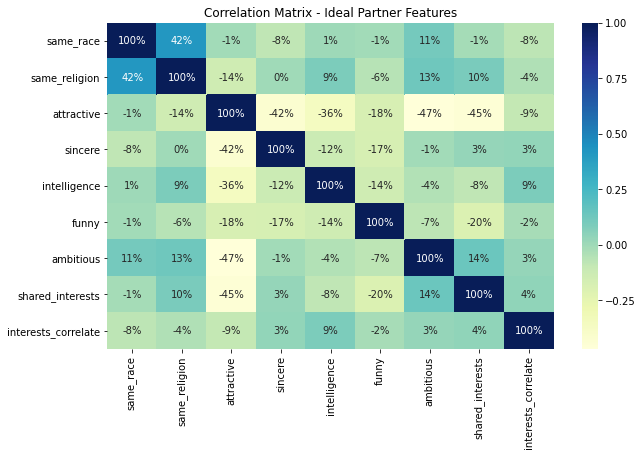

In [8]:
# Plot HeatMap of Correlation Matrix
plt.figure(figsize = (10,6))
plt.title('Correlation Matrix - Ideal Partner Features')
sns.heatmap(data = pearsoncorr, annot = True, fmt = '.0%', cmap = 'YlGnBu')
plt.show()

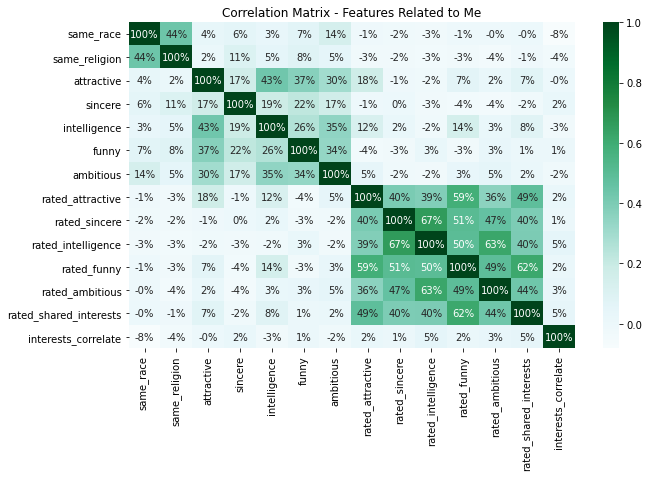

In [9]:
# Pearson Correlation Matrix (Related to Me)
corr_columns2 = ['importance_same_race', 'importance_same_religion','attractive','sincere','intelligence','funny','ambitious', 'attractive_o', 'sincere_o', 'intelligence_o','funny_o', 'ambitious_o', 'shared_interests_o', 'interests_correlate', 'match']
corr_table2 = data[corr_columns2[:-1]]
corr_table2 = corr_table2.rename(columns={'importance_same_race':'same_race','importance_same_religion':'same_religion','attractive_o':'rated_attractive', "sincere_o":"rated_sincere", 'intelligence_o':'rated_intelligence', 'funny_o':'rated_funny', 'ambitious_o':'rated_ambitious', 'shared_interests_o':'rated_shared_interests'})
corr_table2 = corr_table2[(corr_table2 != 0).all(1)] #delete rows with all rating zero
corr_table2 = corr_table2.astype(float)
pearsoncorr2 = corr_table2.corr(method = 'pearson')
pearsoncorr2

# Plot HeatMap of Correlation Matrix2
plt.figure(figsize = (10,6))
plt.title('Correlation Matrix - Features Related to Me')
sns.heatmap(data = pearsoncorr2, annot = True, fmt = '.0%', cmap = 'BuGn')
plt.show()

In [10]:
# create clean_data table for xgboost model
clean_data = data.drop(['d_expected_num_interested_in_me', 'd_expected_num_matches', 'd_like', 'd_guess_prob_liked', 'd_expected_happy_with_sd_people', 'd_interests_correlate', 'd_d_age', 'd_importance_same_religion', 'd_importance_same_race'], axis=1)
clean_data = clean_data.drop([f'd_pref_o_{f}' for f in features], axis=1)
clean_data = clean_data.drop([f'd_{f}_o' for f in features], axis=1)
clean_data = clean_data.drop([f'd_{f}_important' for f in features], axis=1)
clean_data = clean_data.drop([f'd_{f}' for f in features[:-1]], axis=1)
clean_data = clean_data.drop([f'd_{f}_partner' for f in features], axis = 1)
clean_data = clean_data.drop([f'd_{i}' for i in interests], axis = 1)
clean_data = clean_data.replace('?', 0)
clean_data['user'] = clean_data.groupby(features[:-1]).grouper.group_info[0] + 1

In [139]:
matched_cor = clean_data[['user', 'interests_correlate']].astype(float)[clean_data['match'] == 0].groupby('user').mean()

In [140]:
total_cor = clean_data[['user', 'interests_correlate']].astype(float).groupby('user').mean()

In [141]:
(total_cor.mean() - matched_cor.mean()) / np.std(clean_data['interests_correlate'].astype(float))

interests_correlate    0.01051
dtype: float64

In [137]:
np.std(clean_data['interests_correlate'].astype(float))


0.301825070428497

In [321]:
# selected parameters, drop parameters (including drop_fileds and not_suitables)
param = {'booster':'gblinear', 'lambda':1, 'alpha':0, 'subsample':1, 'predictor':'cpu_predictor', 'max_depth':20}
drop_fields = ['match', 'race', 'race_o', 'gender', 'field', 'decision', 'decision_o', 'like', 'guess_prob_liked', 'has_null', 'wave', 'user']
not_suitables = ['shopping', 'tv', 'shared_interests_o', 'attractive_o']

drop_fields.extend(not_suitables)
#drop_fields.extend(clean_data.columns[5:])


accuracy_1 = 0
accuracy_0 = 0
model_features = []

ac0 = 0
for i in range(10):
    testing = clean_data.sample(frac=1/5)
    training = clean_data[(~clean_data.isin(testing))].dropna() 
    
    for _ in range(5):
        #testing = testing.append(testing[testing['match'] == 1])
        training = training.append(training[training['match'] == 1])

    model = XGBClassifier()
    model.fit(training.drop(drop_fields, axis=1).astype(float), training['match'].astype(float))

    ypred = model.predict(testing.drop(drop_fields, axis=1).astype(float))

    #ac1 = sum(ypred == testing['match']) / testing.shape[0]
    ac1 = sum((ypred == testing['match'])[testing['match'] == 1]) / testing[testing['match'] == 1].shape[0]
    ac0 = sum((ypred == testing['match'])[testing['match'] == 0]) / testing[testing['match'] == 0].shape[0]
    print(ac1, ac0)

    model_features.append(model.feature_importances_)
    accuracy_1 += ac1
    accuracy_0 += ac0

print(f'Average 1: {accuracy_1 / 10}')
print(f'Average 0: {accuracy_0 / 10}')
print((accuracy_0 + accuracy_1)/ 20)
# dTrain = xgb.DMatrix(own_feature_data.astype(float), label=clean_data['match'].astype(float))
# bst = xgb.train(param, dTrain) #, xgb_model=bst)  # for retraining
# bst.save_model('./xgb_model.model')


0.5851063829787234 0.8637015781922525
0.6336996336996337 0.8289379900213828
0.6093189964157706 0.8596993557623479
0.5724381625441696 0.8513998564249821
0.6181818181818182 0.8443968593861527
0.6501901140684411 0.8485491861288039
0.6173285198555957 0.8413152251608291
0.61 0.842296511627907
0.6216216216216216 0.8546224417784051
0.6046511627906976 0.8561354019746121
Average 1: 0.6122536412156473
Average 0: 0.8491054406457677
0.7306795409307074


In [314]:
print([np.mean(n) for n in np.array(model_features).swapaxes(0,1)] * np.array(1))
print([np.std(n) / np.mean(n)for n in np.array(model_features).swapaxes(0,1)] * np.array(len(model.feature_importances_)))

[0.01616631 0.01333578 0.01736134 0.0107634  0.01751595 0.01488729
 0.01408346 0.01387095 0.01492594 0.01329799 0.01297218 0.01489345
 0.04365777 0.01425968 0.01908018 0.04928171 0.01042519 0.01802812
 0.0180738  0.02075329 0.01625402 0.01538573 0.01683544 0.01748611
 0.01620658 0.01536471 0.01582676 0.01414919 0.04570573 0.01375203
 0.01913344 0.05582486 0.01099286 0.02580451 0.02082609 0.01659332
 0.02315671 0.01496567 0.01158459 0.01503426 0.01558558 0.01607865
 0.01945235 0.02020182 0.01656794 0.01604246 0.01679646 0.01430782
 0.01484863 0.01323331 0.01621428 0.01337789 0.02142646 0.01734995]
[ 9.286774   5.8692393  6.9905853 11.727707   9.4871     7.709748
  6.091811   9.007259   5.6088047  6.752616   5.4375196  5.941324
  3.7144172  6.846575  10.558932   8.337529   5.3994584  7.9620137
  7.0540757  8.849855   4.423619   7.0506     6.7175264 16.10665
 10.818235  13.745163  16.996078  11.2254095  4.6625285  7.8044767
 12.057793  10.7708645  8.359395   4.9938006 12.495643   7.203298

In [320]:
clean_data.drop(drop_fields, axis=1).columns[12]

'attractive_o'

In [ ]:
sum(clean_data['match'] == 0)

In [308]:
testing.shape

(1676, 69)